# TP EPITA - 1. Clustering

Ce notebook contient notre code pour le TP de Kantar. Notre groupe est constitué de :
- Alexandre Devaux-Rivière
- Valentin San
- Maël Reynaud


---

### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score, silhouette_score
from yellowbrick.cluster import KElbowVisualizer
from sklearn.decomposition import PCA
from plotly.subplots import make_subplots

pd.set_option("display.max_columns", None)

%matplotlib inline

### Clusterisation des 5000 individus en utilisant les variables A9 A10 et A11

---

In [2]:
def get_summary(df):
    df_desc = pd.DataFrame(df.describe(include='all').T)
    df_summary = pd.DataFrame({
        'dtype': df.dtypes,
        'unique':df.nunique().values,
        'missing': df.isna().sum().values,
        'duplicates': df.duplicated().sum(),
        'min': df_desc['min'].values,
        'max': df_desc['max'].values,
        'avg': df_desc['mean'].values,
        'std dev': df_desc['std'].values
    })
    return df_summary

In [3]:
df_codes = pd.read_csv('../data/fic_epita_kantar_codes.csv', delimiter=';')
df_codes

,cle,Respondent_ID,weight,A11,A12,A13,A14,A4,A5,A5bis,A8_1_slice,A8_2_slice,A8_3_slice,A8_4_slice,B1_1_slice,B1_2_slice,B2_1_slice,B2_2_slice,B3,B4,B6,C1_1_slice,C1_2_slice,C1_3_slice,C1_4_slice,C1_5_slice,C1_6_slice,C1_7_slice,C1_8_slice,C1_9_slice,A9_1_slice,A9_2_slice,A9_3_slice,A9_4_slice,A9_5_slice,A9_6_slice,A9_7_slice,A9_8_slice,A9_9_slice,A9_10_slice,A9_11_slice,A9_12_slice,A9_13_slice,A9_14_slice,A9_15_slice,A9_16_slice,A10_1_slice,A10_2_slice,A10_3_slice,A10_4_slice,A10_5_slice,A10_6_slice,A10_7_slice,A10_8_slice,A11_1_slice,A11_2_slice,A11_3_slice,A11_4_slice,A11_5_slice,A11_6_slice,A11_7_slice,A11_8_slice,A11_9_slice,A11_10_slice,A11_11_slice,A11_12_slice,A11_13_slice,A1bis,A2,A6_1_slice,A6_2_slice,A6_3_slice,A6_4_slice,A6_5_slice,A6_6_slice,A7,B5_1_slice,B5_2_slice,B5_3_slice,B5_4_slice,B5_5_slice,B5_6_slice,C201,C202,C203,C204,C205,C206,C207,C208,C209,C210,C211,C212,C213,C214,C215,C216,C217,C218,C219,C220,C301,C302,C303,C304,C305,C306,C307,C308,C309,C310,C311,C4_1_slice,C4_2_slice,C4_3_slice,C4_4_slice,rs3,rs5,rs6,RS1,RS191,RS192,RS193,RS102RECAP,rs11recap2,RS11recap,RS193bis,RS2Recap,RS56Recap,RS2,RS11,RS102
0,1,MET20_999999996,2.501255,1,0,0,0,1,2.0,NaN,2,2,2,2,2,2,2,2,2,2,3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,100,0,0,0,0.0,0,45,2,2,2,2,2,2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2,2,2,2,1,1,5.0,1,1.0,2,2,4,1,2,NaN,1,1,24,0,4
1,2,MET20_98888888,0.722914,1,0,0,0,1,5.0,NaN,2,0,0,0,2,2,2,2,3,3,3,4,4,4,4,4,4,4,4,4,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,100,0,0,0,0.0,0,1,3,3,3,3,3,3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,2,2,2,1,1,2.0,1,1.0,2,2,1,1,2,NaN,4,1,50,0,1
2,3,MET20_1978307,1.039611,1,0,0,0,1,2.0,NaN,5,5,1,1,2,2,2,3,3,3,4,4,4,4,4,4,4,4,4,4,3,2,2,2,3,2,2,2,2,2,2,3,2,3,2,2,2,2,3,2,2,3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,80,0,5,5,0.0,10,5,3,4,4,4,4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,6,7,7,1,1,9.0,2,1.0,1,2,3,2,1,NaN,3,2,37,1,3
3,4,MET20_1302078,0.976590,1,1,1,0,1,1.0,NaN,2,3,2,1,4,3,4,3,3,4,4,4,4,5,5,5,5,5,4,4,1,2,2,2,3,2,3,2,1,2,1,3,3,1,2,3,2,2,3,2,2,3,2,3,2,2,1,2,1,2,3,3,3,2,2,1,2,1,1,30,5,25,15,20.0,5,25,3,4,4,4,4,4,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,7,7,7,2,3,NaN,2,1.0,2,2,2,1,2,NaN,5,3,63,0,2
4,5,MET20_1869308,0.812315,0,1,0,0,2,NaN,1.0,1,1,1,1,4,4,4,4,4,4,3,4,4,4,4,4,4,4,4,4,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,0,0,0,5,0.0,95,1,4,4,4,4,4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,7,7,7,1,1,6.0,1,2.0,2,2,3,2,1,NaN,3,1,44,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,MET20_779605,0.905997,1,0,1,0,3,NaN,1.0,5,6,5,1,4,4,4,4,4,4,4,4,4,5,5,5,5,5,4,5,3,2,3,4,3,2,2,2,1,2,1,3,4,1,2,2,1,1,3,1,1,4,1,2,1,1,1,2,1,2,1,1,1,1,1,1,1,3,1,10,0,50,20,NaN,20,5,3,4,4,3,2,4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7,7,7,7,1,3,NaN,2,1.0,2,2,2,1,2,NaN,6,3,69,0,2
4996,4997,MET20_80000348,1.257884,0,1,0,0,2,NaN,1.0,1,3,1,0,4,4,4,4,3,4,2,4,5,5,5,5,5,5,5,5,2,3,4,3,3,2,4,2,3,2,1,2,3,2,2,3,1,2,3,2,1,3,3,3,3,2,2,2,2,3,2,2,2,2,3,2,4,2,1,0,0,50,0,0.0,50,0,3,4,4,4,4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,7,7,7,1,7,NaN,2,2.0,1,2,1,1,2,NaN,4,3,53,0,1
4997,4998,MET20_288029,1.094695,0,1

On se restreint seulement aux variables A9, A10 et A11.

In [4]:
orange_variables = df_codes.filter(regex=("(weight|A9|A10|A11).*"))
orange_variables

,weight,A11,A9_1_slice,A9_2_slice,A9_3_slice,A9_4_slice,A9_5_slice,A9_6_slice,A9_7_slice,A9_8_slice,A9_9_slice,A9_10_slice,A9_11_slice,A9_12_slice,A9_13_slice,A9_14_slice,A9_15_slice,A9_16_slice,A10_1_slice,A10_2_slice,A10_3_slice,A10_4_slice,A10_5_slice,A10_6_slice,A10_7_slice,A10_8_slice,A11_1_slice,A11_2_slice,A11_3_slice,A11_4_slice,A11_5_slice,A11_6_slice,A11_7_slice,A11_8_slice,A11_9_slice,A11_10_slice,A11_11_slice,A11_12_slice,A11_13_slice
0,2.501255,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
1,0.722914,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2
2,1.039611,1,3,2,2,2,3,2,2,2,2,2,2,3,2,3,2,2,2,2,3,2,2,3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
3,0.976590,1,1,2,2,2,3,2,3,2,1,2,1,3,3,1,2,3,2,2,3,2,2,3,2,3,2,2,1,2,1,2,3,3,3,2,2,1,2
4,0.812315,0,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.905997,1,3,2,3,4,3,2,2,2,1,2,1,3,4,1,2,2,1,1,3,1,1,4,1,2,1,1,1,2,1,2,1,1,1,1,1,1,1
4996,1.257884,0,2,3,4,3,3,2,4,2,3,2,1,2,3,2,2,3,1,2,3,2,1,3,3,3,3,2,2,2,2,3,2,2,2,2,3,2,4
4997,1.094695,0,3,4,4,3,2,2,4,4,3,3,2,4,3,3,3,4,2,2,2,2,2,2,2,2,2,3,3,3,2,3,3,3,2,3,3,2,3
4998,2.022023,0,3,3,4,3,3,2,3,3,2,2,2,4,4,3,3,4,2,2,3,2,2,3,2,2,2,2,2,3,3,2,3,2,3,2,2,1,3


## Etude de la distribution des valeurs dans notre tablea "orange"

In [5]:
orange_variables.to_csv('../data/orange_var_file.csv', sep=';')

In [6]:
get_summary(orange_variables).style.background_gradient(cmap='viridis_r', low=0.8)

,dtype,unique,missing,duplicates,min,max,avg,std dev
weight,float64,169,0,7,0.379603,5.969742,0.968387,0.434649
A11,int64,2,0,7,0.000000,1.000000,0.781800,0.413065
A9_1_slice,int64,4,0,7,1.000000,4.000000,2.209800,0.794676
A9_2_slice,int64,4,0,7,1.000000,4.000000,2.698800,0.843458
A9_3_slice,int64,4,0,7,1.000000,4.000000,2.662000,0.865047
A9_4_slice,int64,4,0,7,1.000000,4.000000,2.602800,0.870163
A9_5_slice,int64,4,0,7,1.000000,4.000000,2.683800,0.832800
A9_6_slice,int64,4,0,7,1.000000,4.000000,2.208000,0.752628
A9_7_slice,int64,4,0,7,1.000000,4.000000,2.488800,1.048663
A9_8_slice,int64,4,0,7,1.000000,4.000000,2.424400,0.852778


On remarque qu'il n'y a pas de valeurs manquantes et qu'elles sont toutes dans l'intervale [0-4] correspondant aux valeurs possibles dans un QCM à 4 choix possibles pour chaque question, ce qui signifie qu'on a déjà une donnée propre et exploitable.

On va maintenant utiliser la feature **weight** en multipliant chacune des autres features par cette valeur.

## Choix du nombre de groupes

Séparons les poids de notre table de données

In [7]:
weights = orange_variables['weight'].values
weights

array([2.50125479, 0.72291398, 1.0396114 , ..., 1.09469527, 2.02202279,
       0.9463952 ])

In [8]:
orange_variables = orange_variables.loc[:, orange_variables.columns != 'weight'].multiply(orange_variables['weight'], axis=0)
orange_variables

,A11,A9_1_slice,A9_2_slice,A9_3_slice,A9_4_slice,A9_5_slice,A9_6_slice,A9_7_slice,A9_8_slice,A9_9_slice,A9_10_slice,A9_11_slice,A9_12_slice,A9_13_slice,A9_14_slice,A9_15_slice,A9_16_slice,A10_1_slice,A10_2_slice,A10_3_slice,A10_4_slice,A10_5_slice,A10_6_slice,A10_7_slice,A10_8_slice,A11_1_slice,A11_2_slice,A11_3_slice,A11_4_slice,A11_5_slice,A11_6_slice,A11_7_slice,A11_8_slice,A11_9_slice,A11_10_slice,A11_11_slice,A11_12_slice,A11_13_slice
0,2.501255,5.002510,5.002510,5.002510,5.002510,5.002510,5.002510,5.002510,5.002510,5.002510,5.002510,5.002510,5.002510,5.002510,5.002510,5.002510,5.002510,5.002510,5.002510,5.002510,5.002510,5.002510,5.002510,5.002510,5.002510,5.002510,5.002510,5.002510,5.002510,5.002510,5.002510,5.002510,5.002510,5.002510,5.002510,5.002510,5.002510,5.002510
1,0.722914,0.722914,0.722914,0.722914,0.722914,0.722914,0.722914,0.722914,0.722914,0.722914,0.722914,0.722914,0.722914,0.722914,0.722914,0.722914,0.722914,0.722914,0.722914,0.722914,0.722914,0.722914,0.722914,0.722914,0.722914,1.445828,1.445828,1.445828,1.445828,1.445828,1.445828,1.445828,1.445828,1.445828,1.445828,1.445828,1.445828,1.445828
2,1.039611,3.118834,2.079223,2.079223,2.079223,3.118834,2.079223,2.079223,2.079223,2.079223,2.079223,2.079223,3.118834,2.079223,3.118834,2.079223,2.079223,2.079223,2.079223,3.118834,2.079223,2.079223,3.118834,2.079223,2.079223,2.079223,2.079223,2.079223,2.079223,2.079223,2.079223,2.079223,2.079223,2.079223,2.079223,2.079223,2.079223,2.079223
3,0.976590,0.976590,1.953180,1.953180,1.953180,2.929770,1.953180,2.929770,1.953180,0.976590,1.953180,0.976590,2.929770,2.929770,0.976590,1.953180,2.929770,1.953180,1.953180,2.929770,1.953180,1.953180,2.929770,1.953180,2.929770,1.953180,1.953180,0.976590,1.953180,0.976590,1.953180,2.929770,2.929770,2.929770,1.953180,1.953180,0.976590,1.953180
4,0.000000,1.624629,1.624629,1.624629,1.624629,1.624629,1.624629,1.624629,1.624629,1.624629,1.624629,1.624629,1.624629,1.624629,1.624629,1.624629,1.624629,1.624629,1.624629,1.624629,1.624629,1.624629,1.624629,1.624629,1.624629,1.624629,1.624629,1.624629,1.624629,1.624629,1.624629,1.624629,1.624629,1.624629,1.624629,1.624629,1.624629,1.624629
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.905997,2.717992,1.811995,2.717992,3.623989,2.717992,1.811995,1.811995,1.811995,0.905997,1.811995,0.905997,2.717992,3.623989,0.905997,1.811995,1.811995,0.905997,0.905997,2.717992,0.905997,0.905997,3.623989,0.905997,1.811995,0.905997,0.905997,0.905997,1.811995,0.905997,1.811995,0.905997,0.905997,0.905997,0.905997,0.905997,0.905997,0.905997
4996,0.000000,2.515769,3.773653,5.031537,3.773653,3.773653,2.515769,5.031537,2.515769,3.773653,2.515769,1.257884,2.515769,3.773653,2.515769,2.515769,3.773653,1.257884,2.515769,3.773653,2.515769,1.257884,3.773653,3.773653,3.773653,3.773653,2.515769,2.515769,2.515769,2.515769,3.773653,2.515769,2.515769,2.515769,2.515769,3.773653,2.515769,5.031537
4997,0.000000,3.284086,4.378781,4.378781,3.284086,2.189391,2.189391,4.378781,4.378781,3.284086,3.284086,2.189391,4.378781,3.284086,3.284086,3.284086,4.378781,2.189391,2.189391,2.189391,2.189391,2.189391,2.189391,2.189391,2.189391,2.189391,3.284086,3.284086,3.284086,2.189391,3.284086,3.284086,3.284086,2.189391,3.284086,3.284086,2.189391,3.284086
4998,0.000000,6.066068,6.066068,8.088091,6.066068,6.066068,4.044046,6.066068,6.066068,4.044046,4.044046,4.044046,8.088091,8.088091,6.066068,6.066068,8.088091,4.044046,4.044046,6.066068,4.044046,4.044046,6.066068,4.044046,4.044046,4.044046,4.044046,4.044046,6.066068,6.066068,4.044046,6.066068,4.044046,6.066068,4.044046,4.044046,2.022023,6.066068


#### Préparation de la donnée

Dans un premier temps, nous allons scale la données puis utiliser la **Silhouette score** (qui mesure à quel point les données sont dans le bon cluster) et le **Calinski-Harabasz score** (qui mesure la séparation des clusters) pour calculer pour différentes tailles de clusters (allant de 2 à 12).

In [9]:
def clustering_analysis(X: pd.DataFrame, weights: np.ndarray):
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # elbow method analysis
    print("Calculating clustering metrics for different numbers of clusters:")
    for nb_clusters in range(2, 12):
        kmeans = KMeans(n_clusters=nb_clusters, random_state=1)
        labels = kmeans.fit_predict(X_scaled, sample_weight=weights)
        s_score = silhouette_score(X_scaled, labels, metric='euclidean')
        ch_score = calinski_harabasz_score(X_scaled, labels)
        print(f"{nb_clusters} clusters - Silhouette score : {s_score:.4f} ; Calinski-Harabasz score : {ch_score:.4f}")

    # elbow curve visualize
    plt.figure(figsize=(10, 6))
    model = KMeans()
    visualizer = KElbowVisualizer(model, k=(2, 12))
    visualizer.fit(X_scaled)
    visualizer.show()

    return X_scaled

Calculating clustering metrics for different numbers of clusters:
2 clusters - Silhouette score : 0.8135 ; Calinski-Harabasz score : 2694.7026
3 clusters - Silhouette score : 0.6779 ; Calinski-Harabasz score : 2013.6998
4 clusters - Silhouette score : 0.3912 ; Calinski-Harabasz score : 2166.4256
5 clusters - Silhouette score : 0.3284 ; Calinski-Harabasz score : 1939.7722
6 clusters - Silhouette score : 0.2710 ; Calinski-Harabasz score : 1866.6631
7 clusters - Silhouette score : 0.2094 ; Calinski-Harabasz score : 1749.7880
8 clusters - Silhouette score : 0.2358 ; Calinski-Harabasz score : 1445.3464
9 clusters - Silhouette score : 0.2358 ; Calinski-Harabasz score : 1291.3652
10 clusters - Silhouette score : 0.1867 ; Calinski-Harabasz score : 1253.0908
11 clusters - Silhouette score : 0.1866 ; Calinski-Harabasz score : 1140.9931


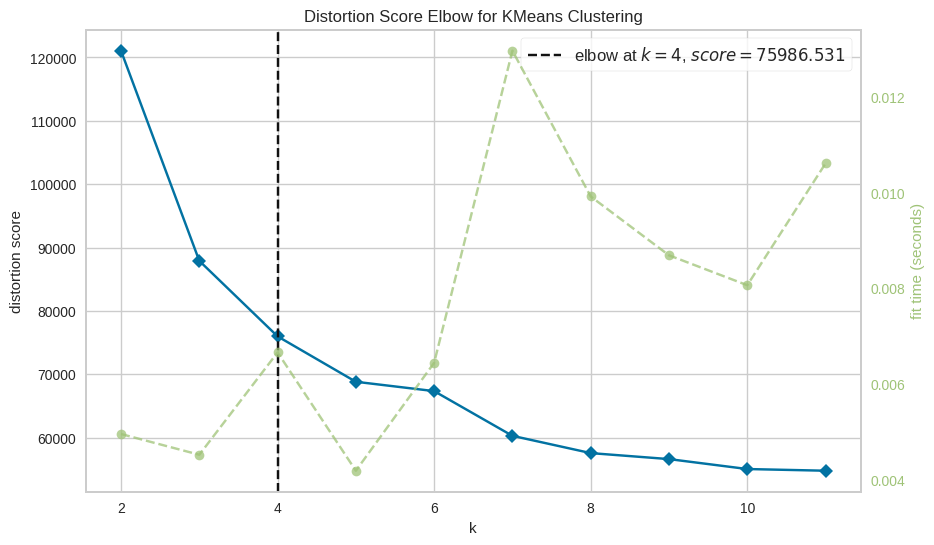

In [10]:
X_scaled = clustering_analysis(orange_variables, weights)

> TODO:

Les résultats obtenus avec ces 3 méthodes sont assez intéressants. La méthode **Elbow** a l'air d'indiquer un résultat optimal avec 4 clusters, alors que le **silhouette score** indique un meilleur résultat à 2 clusters, et le **Calinski-Harabasz score** à 8 clusters. Ceci est dû au fait que ce sont des heuristiques, donc le résultat peut beaucoup varier entre les différentes méthodes.

Afin de comparer nos résultats, utilisons la méthode du dendrogramme.

On définit pour ça la matrice de distances pondérée par les poids des individus.

In [11]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from scipy.spatial.distance import euclidean, squareform
from tqdm import tqdm

In [12]:
def weighted_distance_matrix(X_scaled: pd.DataFrame, weights: np.ndarray):
    n_samples = X_scaled.shape[0]
    distance_matrix = np.zeros((n_samples, n_samples))

    for i in tqdm(range(n_samples)):
        for j in range(i + 1, n_samples):
            distance = euclidean(X_scaled[i] * weights[i], X_scaled[j] * weights[j])
            distance_matrix[i, j], distance_matrix[j, i] = distance, distance
    return distance_matrix

In [13]:
weighted_distances = weighted_distance_matrix(X_scaled, weights)
weighted_distances

100%|██████████| 5000/5000 [01:03<00:00, 78.64it/s] 


array([[ 0.        , 38.71606151, 34.41651509, ..., 31.81860766,
        18.30471224, 33.80950234],
       [38.71606151,  0.        ,  4.94589015, ...,  8.79368822,
        33.84042988,  5.75697937],
       [34.41651509,  4.94589015,  0.        , ...,  5.86389104,
        29.66131036,  2.68702802],
       ...,
       [31.81860766,  8.79368822,  5.86389104, ...,  0.        ,
        25.97272848,  4.83821292],
       [18.30471224, 33.84042988, 29.66131036, ..., 25.97272848,
         0.        , 28.78262736],
       [33.80950234,  5.75697937,  2.68702802, ...,  4.83821292,
        28.78262736,  0.        ]])

In [14]:
condensed_weighted_distances = squareform(weighted_distances)
condensed_weighted_distances

array([38.71606151, 34.41651509, 35.57383903, ..., 25.97272848,
        4.83821292, 28.78262736])

In [15]:
Z = linkage(condensed_weighted_distances, method='ward')
Z

array([[8.30000000e+02, 1.95500000e+03, 0.00000000e+00, 2.00000000e+00],
       [2.11000000e+03, 5.00000000e+03, 0.00000000e+00, 3.00000000e+00],
       [1.22700000e+03, 2.60300000e+03, 0.00000000e+00, 2.00000000e+00],
       ...,
       [9.99200000e+03, 9.99400000e+03, 5.46818099e+02, 1.80000000e+01],
       [9.99100000e+03, 9.99500000e+03, 6.82345798e+02, 4.98200000e+03],
       [9.99600000e+03, 9.99700000e+03, 1.47840586e+03, 5.00000000e+03]])

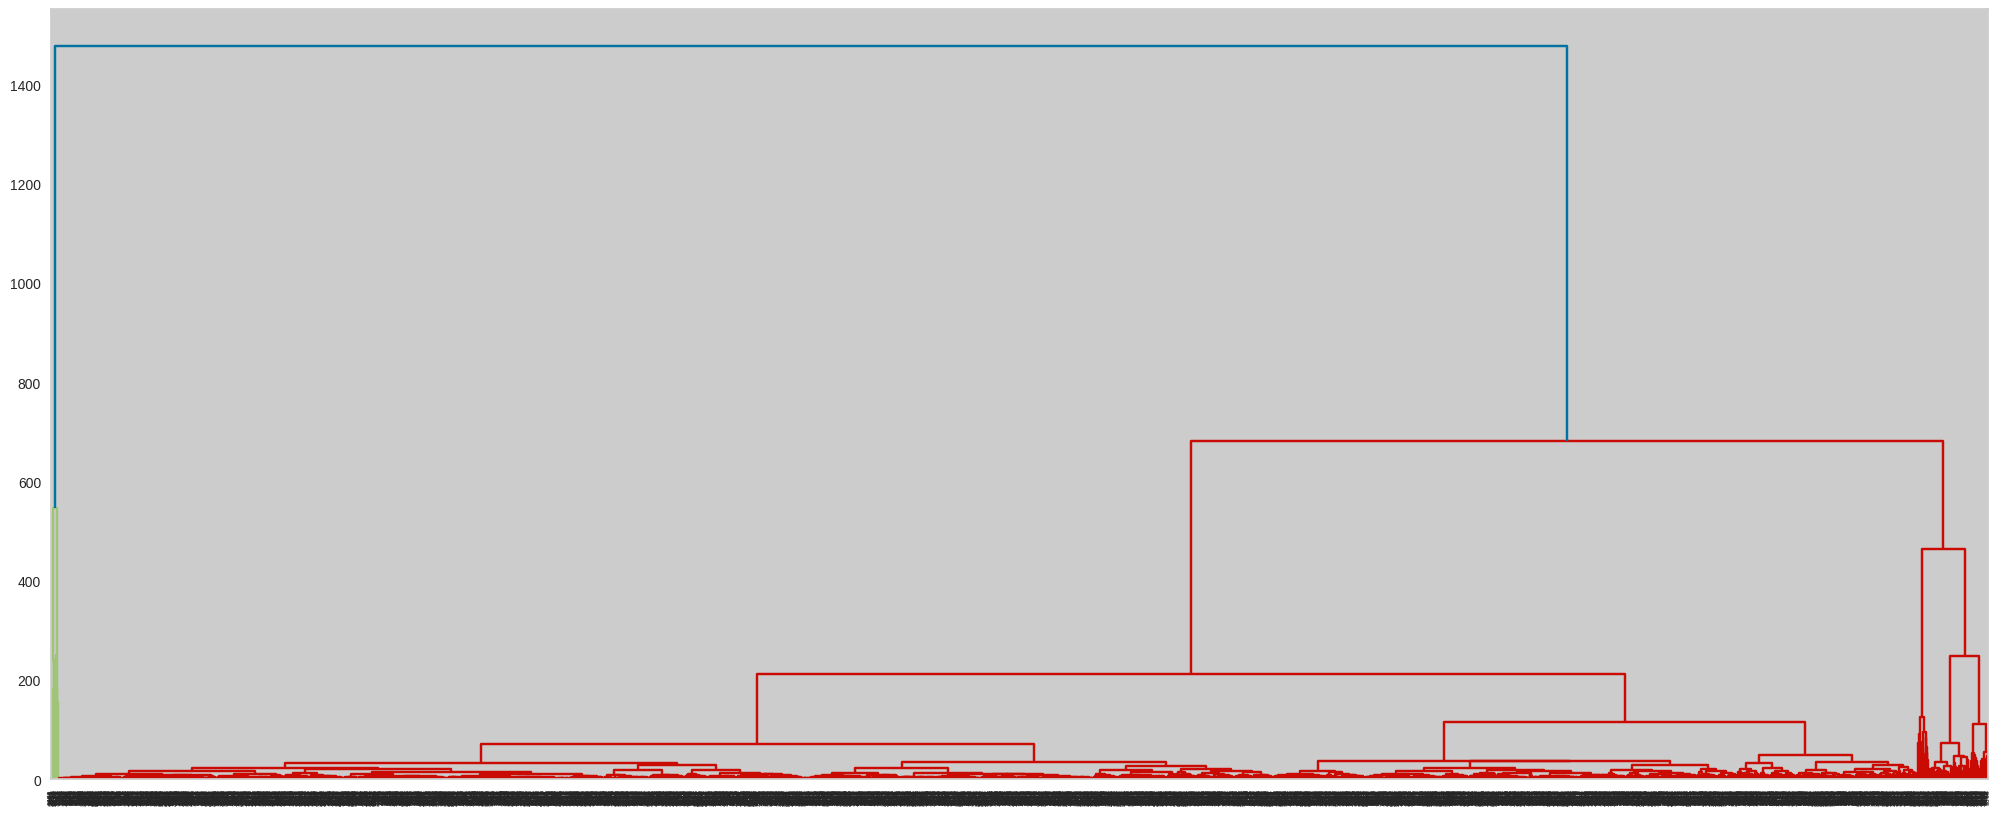

In [16]:
plt.figure(figsize=(25, 10))
dendrogram(Z, orientation='top')
plt.show()

On va choisir un nombre de clusters de 4.

#### Visualisation

Définition d'une fonction d'affichage des clusters en 3D avec nos 4 clusters représenté par des couleurs différentes.

In [17]:
def visualize_clusters_plotly(X_scaled, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, random_state=1)
    labels = kmeans.fit_predict(X_scaled)

    plot_df = pd.DataFrame({
        'A9': X_scaled[:, 0],
        'A10': X_scaled[:, 1],
        'A11': X_scaled[:, 2],
        'Cluster': labels,
    })

    # 3D plotly scatter plot
    fig = go.Figure()

    # Add traces for each cluster
    for cluster in range(n_clusters):
        cluster_data = plot_df[plot_df['Cluster'] == cluster]

        fig.add_trace(go.Scatter3d(
            x=cluster_data['A9'],
            y=cluster_data['A10'],
            z=cluster_data['A11'],
            mode='markers',
            name=f'Cluster {cluster}',
            hovertemplate=(
                'A9: %{x:.2f}<br>' +
                'A10: %{y:.2f}<br>' +
                'A11: %{z:.2f}<br>' +
                '<extra></extra>'
            ),
        ))

    fig.update_layout(
        title=f'Cluster visualization ({n_clusters} clusters)',
        scene=dict(
            xaxis_title='A9 (scaled)',
            yaxis_title='A10 (scaled)',
            zaxis_title='A11 (scaled)',
        ),
        showlegend=True,
        legend_title_text='Clusters',
        width=1000,
        height=800,
    )

    return fig, plot_df

In [18]:
nb_clusters = 4
fig, plot_df = visualize_clusters_plotly(X_scaled, n_clusters=nb_clusters)

In [19]:
fig.show()

In [20]:
for i in range(nb_clusters):
  clu = plot_df[plot_df["Cluster"] == i]

  print(f"Ratio variance intra cluster {i} / inter cluster :\n{clu.var()}\n")

Ratio variance intra cluster 0 / inter cluster :
A9         2.289341
A10        0.739603
A11        0.740490
Cluster    0.000000
dtype: float64

Ratio variance intra cluster 1 / inter cluster :
A9         0.388385
A10        0.152679
A11        0.188805
Cluster    0.000000
dtype: float64

Ratio variance intra cluster 2 / inter cluster :
A9         0.670859
A10        0.253908
A11        0.235456
Cluster    0.000000
dtype: float64

Ratio variance intra cluster 3 / inter cluster :
A9         12.432562
A10        10.449176
A11         7.844001
Cluster     0.000000
dtype: float64



Les données étant normalisées, on obtient directement le ratio variance intro groupe / inter groupe en calculant la variance de chaque colonne dans chaque cluster. On remarque dans les clusters 1 et 2 une variance très basse, ce qui est bon signe, car cela signifie que les données se ressemble beaucoup. Dans le cluster 1, la variance est un peu plus élevé, et dans le dernier cluster, on remarque des variances très hautes. On peut interpréter ce dernier cluster comme un "fourre tout".

# Clustering avec PCA

On va réduire la dimensionnalité de nos données avec PCA avant le clustering.

In [21]:
def pca_analysis(X: pd.DataFrame):
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    pca = PCA()
    X_pca = pca.fit_transform(X_scaled)
    df_pca = pd.DataFrame(data=X_pca[:, :3], columns=["PCA1", "PCA2", "PCA3"])
    print(f"PCA explained variance: {pca.explained_variance_ratio_}\n")

    # Elbow method analysis
    print("Calculating clustering metrics for different numbers of clusters:")
    for nb_clusters in range(2, 12):
        kmeans = KMeans(n_clusters=nb_clusters, random_state=1)
        labels = kmeans.fit_predict(X_pca)
        s_score = silhouette_score(X_pca, labels, metric='euclidean')
        ch_score = calinski_harabasz_score(X_pca, labels)
        print(f"{nb_clusters} clusters - Silhouette score : {s_score:.4f} ; Calinski-Harabasz score : {ch_score:.4f}")

    # Visualize elbow curve
    model = KMeans()
    visualizer = KElbowVisualizer(model, k=(2, 12))
    visualizer.fit(X_pca)
    plt.figure(figsize=(10, 6))
    visualizer.show()

    return df_pca, pca

PCA explained variance: [0.72353043 0.03462886 0.02717957 0.02176171 0.01599199 0.0142159
 0.01226912 0.01100032 0.00928638 0.00809404 0.0072329  0.00687428
 0.00658179 0.00640955 0.0060679  0.0057219  0.00546801 0.00544366
 0.00490421 0.00479307 0.00448769 0.00423892 0.0041023  0.00405377
 0.00400107 0.0039266  0.00366657 0.00360376 0.00350288 0.00344655
 0.00331819 0.00323391 0.00311308 0.00301208 0.00297056 0.00291425
 0.00277263 0.00217957]

Calculating clustering metrics for different numbers of clusters:
2 clusters - Silhouette score : 0.7620 ; Calinski-Harabasz score : 2845.7190
3 clusters - Silhouette score : 0.3136 ; Calinski-Harabasz score : 2901.8540
4 clusters - Silhouette score : 0.2398 ; Calinski-Harabasz score : 2498.7380
5 clusters - Silhouette score : 0.2120 ; Calinski-Harabasz score : 2245.0087
6 clusters - Silhouette score : 0.1671 ; Calinski-Harabasz score : 1988.7933
7 clusters - Silhouette score : 0.1325 ; Calinski-Harabasz score : 1790.5224
8 clusters - Silhouett

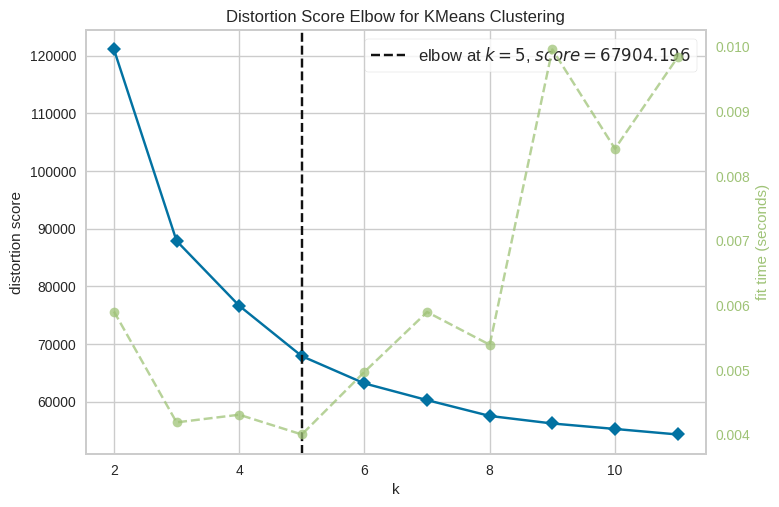

<Figure size 1000x600 with 0 Axes>

In [22]:
df_pca, pca = pca_analysis(orange_variables)

### 1. PCA explained variance ratios:

The PCA analysis shows that the first three principal components explain 78.0%, 13.1%, and 8.8% of the variance, respectively. Together, these components capture close to 100% of the variability in the data, which means that the PCA effectively reduces dimensionality while retaining most of the information.

### 2. Silhouette / Calinski-Harabasz scores and Elbow methods:

After PCA, the **Silhouette** and **Calinski-Harabasz** scores are very similar to the scores from the other approach. We can say that this consistency indicates that PCA did not alter the clustering results, despite reducing the data's dimensionality. The elbow curve also identifies 4 clusters as the optimal number.

The experiment justifies selecting 4 as the optimal number of clusters.

### Visualization

In [23]:
def visualize_pca_clusters(df_pca: pd.DataFrame, n_clusters: int):
    kmeans = KMeans(n_clusters=n_clusters, random_state=1)
    labels = kmeans.fit_predict(df_pca)

    # 2 rows and 2 columns subplot
    fig = make_subplots(
        rows=2, cols=2,
        specs=[
            [{'type': 'scatter3d'}, {'type': 'scatter'}],
            [{'type': 'scatter'}, {'type': 'scatter'}]
        ],
        subplot_titles=(
            '3D PCA plot (PC1 vs PC2 vs PC3)',
            '2D PCA plot (PC1 vs PC2)',
            '2D PCA plot (PC1 vs PC3)',
            '2D PCA plot (PC2 vs PC3)'
        )
    )

    # 3D plot
    for i in range(n_clusters):
        mask = labels == i
        fig.add_trace(
            go.Scatter3d(
                x=df_pca["PCA1"][mask],
                y=df_pca["PCA2"][mask],
                z=df_pca["PCA3"][mask],
                mode='markers',
                name=f'Cluster {i}',
                showlegend=True,
                hovertemplate=(
                    'PC1: %{x:.2f}<br>' +
                    'PC2: %{y:.2f}<br>' +
                    'PC3: %{z:.2f}<br>' +
                    '<extra></extra>'
                ),
            ),
            row=1, col=1
        )

    fig.update_scenes(
        camera=dict(
            up=dict(x=0, y=0, z=1),
            center=dict(x=0, y=0, z=0),
            eye=dict(x=1.2, y=1.2, z=1.2)
        )
    )

    # PC1 vs PC2
    for i in range(n_clusters):
        mask = labels == i
        fig.add_trace(
            go.Scatter(
                x=df_pca["PCA1"][mask],
                y=df_pca["PCA2"][mask],
                mode='markers',
                name=f'Cluster {i}',
                showlegend=False,
                hovertemplate=(
                    'PC1: %{x:.2f}<br>' +
                    'PC2: %{y:.2f}<br>' +
                    '<extra></extra>'
                ),
            ),
            row=1, col=2
        )

    # PC1 vs PC3
    for i in range(n_clusters):
        mask = labels == i
        fig.add_trace(
            go.Scatter(
                x=df_pca["PCA1"][mask],
                y=df_pca["PCA3"][mask],
                mode='markers',
                name=f'Cluster {i}',
                showlegend=False,
                hovertemplate=(
                    'PC1: %{x:.2f}<br>' +
                    'PC3: %{z:.2f}<br>' +
                    '<extra></extra>'
                ),
            ),
            row=2, col=1
        )

    # PC2 vs PC3
    for i in range(n_clusters):
        mask = labels == i
        fig.add_trace(
            go.Scatter(
                x=df_pca["PCA2"][mask],
                y=df_pca["PCA3"][mask],
                mode='markers',

                name=f'Cluster {i}',
                showlegend=False,
                hovertemplate=(
                    'PC2: %{x:.2f}<br>' +
                    'PC3: %{y:.2f}<br>' +
                    '<extra></extra>'
                ),
            ),
            row=2, col=2
        )

    fig.update_layout(
        title=f'PCA Visualization with {n_clusters} clusters<br>',
        height=1000,
        width=1200,
        showlegend=True,
    )

    fig.update_xaxes(title_text="PC1", row=1, col=2)
    fig.update_yaxes(title_text="PC2", row=1, col=2)
    fig.update_xaxes(title_text="PC1", row=2, col=1)
    fig.update_yaxes(title_text="PC3", row=2, col=1)
    fig.update_xaxes(title_text="PC2", row=2, col=2)
    fig.update_yaxes(title_text="PC3", row=2, col=2)

    return fig, labels

In [24]:
nb_clusters = 4
fig, labels = visualize_pca_clusters(df_pca, 5)
fig.show()
df_pca["cluster"] = labels

In [25]:
for i in range(nb_clusters):
  clu = df_pca[df_pca["cluster"] == i]
  print(f"Ratio variance intra cluster {i} / inter cluster :\n{clu.var() / df_pca.var()}\n")

Ratio variance intra cluster 0 / inter cluster :
PCA1       0.187223
PCA2       1.659237
PCA3       1.642797
cluster    0.000000
dtype: float64

Ratio variance intra cluster 1 / inter cluster :
PCA1       0.051510
PCA2       0.672413
PCA3       0.747147
cluster    0.000000
dtype: float64

Ratio variance intra cluster 2 / inter cluster :
PCA1       1.126218
PCA2       8.118972
PCA3       6.147226
cluster    0.000000
dtype: float64

Ratio variance intra cluster 3 / inter cluster :
PCA1       0.062120
PCA2       0.476140
PCA3       0.420781
cluster    0.000000
dtype: float64



Despite some overlap, the clusters are reasonably well separated, supporting the choice of 4 clusters as optimal.

**Conclusion: In this study, we found that the optimal clustering for orange values is 4!**

### Clusterisation des 5000 individus en utilisant les variables en verte

## 2. Réaffectation des individus dans les groupes avec variables actives

## 3. Réaffectation des individus dans les groupes avec variables illustratives